In [59]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt

Cargar el archivo CSV

In [60]:
data = pd.read_csv('Ventas_Bebidas_Demo.csv', encoding='ISO-8859-1')

Preprocesar los datos: crear una tabla de crosstab (pedido por sabor y marca)

In [61]:
basket = pd.crosstab(data['PEDIDO'], [data['SABOR'], data['MARCA']])

Convertir los valores mayores a 0 en 1 (presencia del producto)

In [62]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\ingjo\AppData\Local\Temp\ipykernel_11800\3498954818.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Definir el umbral mÃ­nimo de soporte

In [63]:
min_support = 0.05

Aplicar el algoritmo Apriori

In [64]:
frequent_itemsets_apriori = apriori(basket, min_support=min_support, use_colnames=True)

c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Aplicar el algoritmo FP-Growth

In [65]:
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.06, use_colnames=True)

c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Obtener las reglas de asociaciÃ³n para Apriori

In [66]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

Obtener las reglas de asociaciÃ³n para FP-Growth

In [67]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=0.9)

Graficar los resultados para Apriori

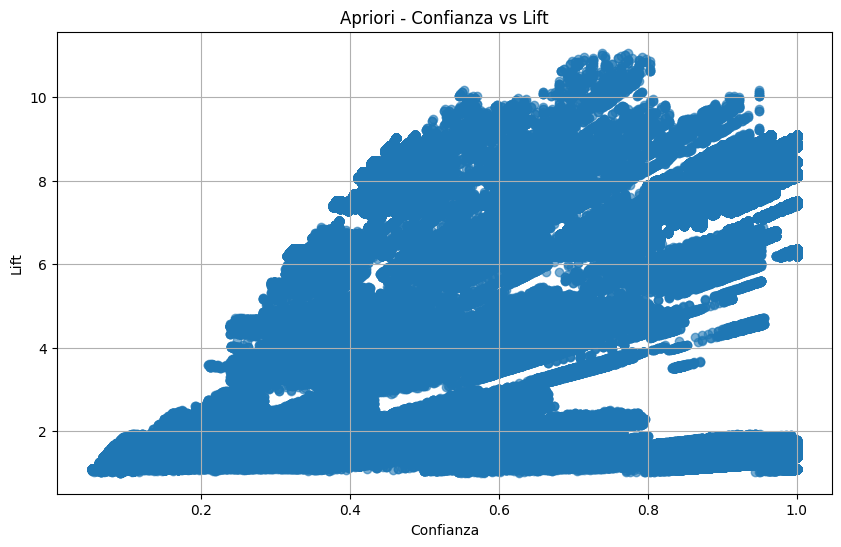

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_apriori['confidence'], rules_apriori['lift'], alpha=0.6, marker="o")
plt.title('Apriori - Confianza vs Lift')
plt.xlabel('Confianza')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

Graficar los resultados para FP-Growth

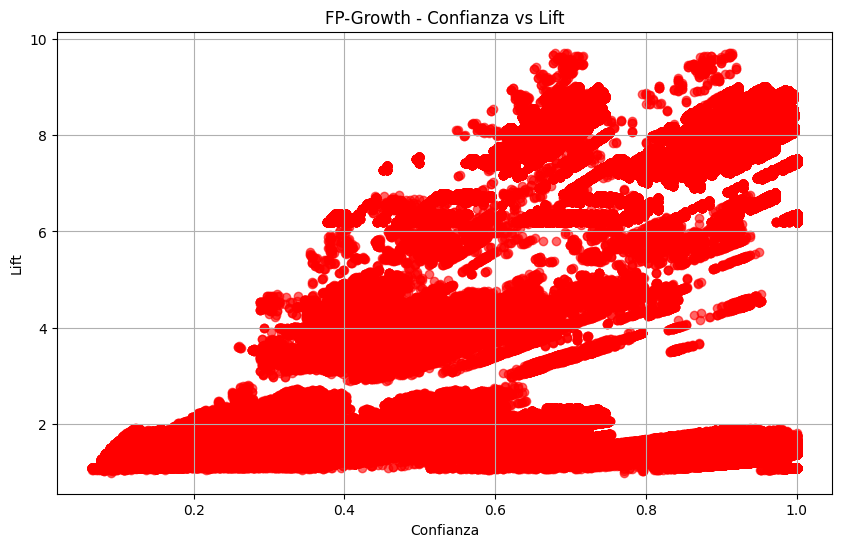

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_fpgrowth['confidence'], rules_fpgrowth['lift'], alpha=0.6, marker="o", color='r')
plt.title('FP-Growth - Confianza vs Lift')
plt.xlabel('Confianza')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

Mostrar las reglas generadas por Apriori

In [70]:
print("Reglas generadas por Apriori:")
print(rules_apriori.head())

Reglas generadas por Apriori:
                    antecedents                   consequents  \
0  ((AGUA, CIEL AGUA PURIFICA))     ((AGUA, TOPO CHICO A.M.))   
1     ((AGUA, TOPO CHICO A.M.))  ((AGUA, CIEL AGUA PURIFICA))   
2  ((AGUA, CIEL AGUA PURIFICA))           ((COLA, COCA-COLA))   
3           ((COLA, COCA-COLA))  ((AGUA, CIEL AGUA PURIFICA))   
4  ((AGUA, CIEL AGUA PURIFICA))     ((COLA, COCA-COLA LIGHT))   

   antecedent support  consequent support   support  confidence      lift  \
0            0.332539            0.354390  0.137863    0.414576  1.169829   
1            0.354390            0.332539  0.137863    0.389013  1.169829   
2            0.332539            0.924116  0.318236    0.956989  1.035573   
3            0.924116            0.332539  0.318236    0.344368  1.035573   
4            0.332539            0.786651  0.276520    0.831541  1.057065   

   leverage  conviction  zhangs_metric  
0  0.020014    1.102807       0.217502  
1  0.020014    1.092432       0.22

Mostrar las reglas generadas por FP-Growth

In [71]:
print("\nReglas generadas por FP-Growth:")
print(rules_fpgrowth.head())


Reglas generadas por FP-Growth:
                    antecedents                   consequents  \
0     ((COLA, COCA-COLA LIGHT))           ((COLA, COCA-COLA))   
1           ((COLA, COCA-COLA))     ((COLA, COCA-COLA LIGHT))   
2  ((AGUA, CIEL AGUA PURIFICA))           ((COLA, COCA-COLA))   
3           ((COLA, COCA-COLA))  ((AGUA, CIEL AGUA PURIFICA))   
4  ((AGUA, CIEL AGUA PURIFICA))     ((COLA, COCA-COLA LIGHT))   

   antecedent support  consequent support   support  confidence      lift  \
0            0.786651            0.924116  0.764799    0.972222  1.052056   
1            0.924116            0.786651  0.764799    0.827601  1.052056   
2            0.332539            0.924116  0.318236    0.956989  1.035573   
3            0.924116            0.332539  0.318236    0.344368  1.035573   
4            0.332539            0.786651  0.276520    0.831541  1.057065   

   leverage  conviction  zhangs_metric  
0  0.037843    2.731824       0.231923  
1  0.037843    1.237532       0